# DSC 540 FINAL PROJECT

Source Link :- https://www.kaggle.com/code/preciousorekha/usa-2016-presidential-election-by-county/data?select=usa-2016-presidential-election-by-county.csv

Team Members :- Samuel Chinta Prasad, Goutham Selvakumar

# Abstract :-
        This project focuses on the application of Data Mining and Machine Learning in order to build a strong classification models that can identify the important attributes of voters whom are essential for the winning percentage of the candidates. Various classification techniques are used in this project including Decision Tree, Random Forest, Logistic Regression, SVC, and KNN. The best model among these are chosen by it's highest accuracy, F1, and recall.

# Data :-
          1. The dataset link is given at the top.
          2. The dataset consists of 3143 observations by county
          3. Since some of the features are irrelavent to the project, those are dropped during the analysis             

# Goal :-
Using the several of the Machine Learning model, a strong classification models are built in order to identify the features that are of important in order to predict the election results of 2016. 

# Exploratory Data Analysis

Target Variable :- 
        The "target_winner" variable is extracted from the 2016 election columns that represents the winning candidate.

In [1]:
#Importing the necessary packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the election dataset
data = pd.read_csv('C:/Users/admin/Desktop/Election.csv', sep=';')

In [3]:
data.shape

(3143, 159)

In [4]:
data.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nebraska,NE,31145,"Red Willow County, Nebraska",13.0,5061.0,1216.0,952.0,3735.0,3891.0,...,5044.0,4936.0,93.0,93.0,0.018841,0.018438,0.803428,0.754393,0.196572,0.245607
2,California,CA,6015,"Del Norte County, California",18.0,9361.0,4323.0,3791.0,4967.0,4614.0,...,9531.0,8770.0,241.0,365.0,0.041619,0.025286,0.548959,0.534661,0.451041,0.465339
3,Florida,FL,12031,"Duval County, Florida",199.0,428734.0,202618.0,196737.0,210537.0,211615.0,...,415761.0,411848.0,2606.0,3496.0,0.008489,0.006268,0.518217,0.509584,0.481783,0.490416
4,Kansas,KS,20053,"Ellsworth County, Kansas",25.0,2626.0,851.0,702.0,2021.0,1930.0,...,2938.0,2712.0,66.0,80.0,0.029499,0.022464,0.733283,0.703691,0.266717,0.296309


In [5]:
data.describe(include='all')

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
count,3143,3142,3143.000000,3143,3111.000000,3.111000e+03,3.112000e+03,3.112000e+03,3112.000000,3112.000000,...,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
unique,51,51,NaN,3143,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Texas,TX,NaN,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,254,254,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,30390.411709,NaN,54.927997,4.176518e+04,2.229240e+04,2.113845e+04,19201.429306,19526.023136,...,4.208700e+04,4.138286e+04,593.165810,718.383355,0.018472,0.016468,0.607775,0.577527,0.392225,0.422473
std,NaN,NaN,15164.717720,NaN,172.872053,1.134234e+05,7.714042e+04,7.423506e+04,44865.312835,44782.529305,...,1.199522e+05,1.170526e+05,1856.868432,2310.513184,0.009095,0.008552,0.150378,0.140607,0.150378,0.140607
min,NaN,NaN,1001.000000,NaN,1.000000,6.400000e+01,8.000000e+00,5.000000e+00,67.000000,54.000000,...,7.900000e+01,6.400000e+01,0.000000,0.000000,0.000000,0.000000,0.060160,0.065992,0.034722,0.050314
25%,NaN,NaN,18178.000000,NaN,11.000000,4.837000e+03,1.810000e+03,1.558250e+03,2881.250000,2918.000000,...,4.974750e+03,4.837500e+03,71.000000,74.000000,0.012308,0.010618,0.515391,0.486565,0.283582,0.319085
50%,NaN,NaN,29177.000000,NaN,20.000000,1.094800e+04,4.505500e+03,3.999000e+03,6312.000000,6450.500000,...,1.105800e+04,1.080150e+04,169.500000,181.500000,0.017343,0.015728,0.620527,0.581609,0.379473,0.418391
75%,NaN,NaN,45082.000000,NaN,38.000000,2.880700e+04,1.238600e+04,1.136500e+04,16036.000000,16330.000000,...,2.916075e+04,2.847075e+04,446.000000,517.250000,0.023933,0.020763,0.716418,0.680915,0.484609,0.513435


In [6]:
#info
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 159 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    State                                                       object 
 1    ST                                                          object 
 2    Fips                                                        int64  
 3    County                                                      object 
 4    Precincts                                                   float64
 5    Votes                                                       float64
 6    Democrats 08 (Votes)                                        float64
 7    Democrats 12 (Votes)                                        float64
 8    Republicans 08 (Votes)                                      float64
 9    Republicans 12 (Votes)                                      float64
 10 

In [7]:
print(data.select_dtypes(include='object').columns)

Index(['State', 'ST', 'County', 'Temp Bins', 'Lon Bins', 'Precip Bins',
       'Elevation Bins', 'Geo Shape', 'Name 16', 'Name Prev'],
      dtype='object')


In [8]:
#Object datatypes of 10 columns
data.select_dtypes(include='object')

,State,ST,County,Temp Bins,Lon Bins,Precip Bins,Elevation Bins,Geo Shape,Name 16,Name Prev
0,Alaska,AK,"Haines Borough, Alaska","-10.1,6.44","[-164,-109]","(1.27e+03,1.39e+03]","(38.9,105]","{""type"": ""Polygon"", ""coordinates"": [[[-135.004...",NaN,Haines
1,Nebraska,NE,"Red Willow County, Nebraska",NaN,"(-109,-100]","(444,628]","(572,1.01e+03]","{""type"": ""Polygon"", ""coordinates"": [[[-100.759...",Red Willow,Red Willow
2,California,CA,"Del Norte County, California",NaN,"[-164,-109]","(1.39e+03,4.3e+03]","(38.9,105]","{""type"": ""Polygon"", ""coordinates"": [[[-124.316...",Del Norte,Del Norte
3,Florida,FL,"Duval County, Florida","18.5,25.2","(-82.1,-78.2]",NaN,"[-12.3,38.9]","{""type"": ""Polygon"", ""coordinates"": [[[-81.8312...",Duval,Duval
4,Kansas,KS,"Ellsworth County, Kansas",NaN,"(-100,-96.7]","(628,818]","(396,572]","{""type"": ""Polygon"", ""coordinates"": [[[-98.4855...",Ellsworth,Ellsworth
...,...,...,...,...,...,...,...,...,...,...
3138,Tennessee,TN,"Obion County, Tennessee",NaN,"(-90.4,-87.2]","(1.27e+03,1.39e+03]","(38.9,105]","{""type"": ""Polygon"", ""coordinates"": [[[-89.2563...",Obion,Obion
3139,Michigan,MI,"Macomb County, Michigan",NaN,"(-84.5,-82.1]","(818,932]","(167,216]","{""type"": ""Polygon"", ""coordinates"": [[[-82.7292...",Macomb,Macomb
3140,West Virginia,WV,"Braxton County, West Virginia",NaN,"(-82.1,-78.2]","(1.19e+03,1.27e+03]","(216,259]","{""type"": ""Polygon"", ""coordinates"": [[[-80.9333...",Braxton,Braxton
3141,North Carolina,NC,"Mitchell County, North Carolina","10.7,12.0","(-84.5,-82.1]",NaN,"(572,1.01e+03]","{""type"": ""Polygon"", ""coordinates"": [[[-82.2451...",Mitchell,Mitchell


tar_winner is the new target column and the missing rows are dropped

Repulicans won = 1, Democrats won = 0

In [9]:
#The missing variable is dropped
#Republicans
print(data['Republicans 2016'].isnull().sum())
#Democrats
print(data['Democrats 2016'].isnull().sum())

32
32


In [10]:
data = data.dropna(subset = ['Republicans 2016', 'Democrats 2016'])

In [11]:
print(data['Republicans 2016'].isnull().sum())
print(data['Democrats 2016'].isnull().sum())
data.shape

0
0


(3111, 159)

In [12]:
#Conditions
conditions = [
    (data['Republicans 2016'] > data['Democrats 2016']),
    (data['Republicans 2016'] < data['Democrats 2016'])]
choices = [1,0]
data["tar_winner"] = np.select(conditions, choices, default='null')
data["tar_winner"] = data["tar_winner"].astype(int)

In [13]:
data["tar_winner"][:5]

1    1
2    1
3    1
4    1
5    1
Name: tar_winner, dtype: int32

In [14]:
data['Republicans 2016'][:5]

1    83.224659
2    54.844568
3    48.995648
4    73.610053
5    81.604697
Name: Republicans 2016, dtype: float64

In [15]:
data['Democrats 2016'][:5]

1    12.606204
2    37.228929
3    47.494950
4    19.611577
5    14.970646
Name: Democrats 2016, dtype: float64

In [16]:
#Dropping columns that are of less use
rem_list= list(data)[2:3] + list(data)[4:14] + list(data)[35:36] +list(data)[43:50] +list(data)[52:54] + list(data)[70:-1]

In [17]:
print(rem_list)

['Fips', 'Precincts', 'Votes', 'Democrats 08 (Votes)', 'Democrats 12 (Votes)', 'Republicans 08 (Votes)', 'Republicans 12 (Votes)', 'Republicans 2016', 'Democrats 2016', 'Green 2016', 'Libertarians 2016', 'Gini.Coefficient', 'White', 'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'White  Asian', 'lon', 'lat', 'CA', 'S', 'MAR', 'CFS', 'ACFS', 'Mean Alc', 'Max Alc', 'Mixedness', 'elevation', 'Annual Prcp', 'Winter Prcp', 'Summer Prcp', 'Spring Prcp', 'Autumn Prcp', 'Annual Tavg', 'Annual Tmax', 'Annual Tmin', 'Winter Tavg', 'Winter Tmax', 'Winter Tmin', 'Summer Tavg', 'Summer Tmax', 'Summer Tmin', 'Spring Tavg', 'Spring Tmax', 'Spring Tmin', 'Autumn Tavg', 'Autumn Tmax', 'Autumn Tmin', 'Nearest County', 'temp', 'precip', 'Temp Bins', 'Lat Bins', 'Lon Bins', 'Precip Bins', 'Elevation Bins', 'Geo Shape', 'Name 16', 'reporting', 'Votes16 Trumpd', 'Votes16 Clintonh', 'Votes16 Johnsong', 'Votes16 Steinj', 'Votes16 Castled', 'Votes16 De La Fuenter', 'Est Votes Remaining', 'Votes16 Mcmulli

In [18]:
data_2 = data.drop(rem_list, axis=1)

In [19]:
data_2.columns

Index(['State', 'ST', 'County', 'Republicans 2012', 'Republicans 2008',
       'Democrats 2012', 'Democrats 2008', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occu

In [20]:
#2008 and 2012 winners are created by new features
#Changing them to boolean
print(data_2['Republicans 2008'].isnull().sum())
print(data_2['Democrats 2008'].isnull().sum())

0
0


In [21]:
conditions08 = [
    (data_2['Republicans 2008'] > data_2['Democrats 2008']),
    (data_2['Republicans 2008'] < data_2['Democrats 2008'])]
choices = [1,0]
data_2["2008 winner"] = np.select(conditions08, choices, default='null')
data_2["2008 winner"] = data_2["2008 winner"].astype(int)

In [22]:
data_2["2008 winner"][:5]

1    1
2    1
3    1
4    1
5    1
Name: 2008 winner, dtype: int32

In [23]:
data_2['Republicans 2008'][:5]

1    74.048374
2    52.114154
3    50.638949
4    68.788291
5    73.507329
Name: Republicans 2008, dtype: float64

In [24]:
data_2['Democrats 2008'][:5]

1    24.107851
2    45.357255
3    48.734249
4    28.965283
5    24.919557
Name: Democrats 2008, dtype: float64

In [25]:
print(data_2['Republicans 2012'].isnull().sum())
print(data_2['Democrats 2012'].isnull().sum())

0
0


In [26]:
conditions12 = [
    (data_2['Republicans 2012'] > data_2['Democrats 2012']),
    (data_2['Republicans 2012'] < data_2['Democrats 2012'])]
choices = [1,0]
data_2["2012 winner"] = np.select(conditions12, choices, default='null')
data_2["2012 winner"] = data_2["2012 winner"].astype(int)

In [27]:
data_2["2012 winner"][:5]

1    1
2    1
3    1
4    1
5    1
Name: 2012 winner, dtype: int32

In [28]:
data_2['Republicans 2012'][:5]

1    78.829011
2    52.611174
3    51.381820
4    71.165192
5    77.645410
Name: Republicans 2012, dtype: float64

In [29]:
data_2['Democrats 2012'][:5]

1    19.286872
2    43.226910
3    47.769323
4    25.884956
5    20.988087
Name: Democrats 2012, dtype: float64

In [30]:
#Removing the results of data_2 from the 2008 and 2012 Replublican/Democrat
drop_res =['Democrats 2012', 'Republicans 2012', 'Democrats 2008', 'Republicans 2008']
data_3 = data_2.drop(drop_res, axis=1)
data_3.shape

(3111, 48)

In [31]:
data_3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 1 to 3142
Data columns (total 48 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   State                                                       3111 non-null   object 
 1   ST                                                          3111 non-null   object 
 2   County                                                      3111 non-null   object 
 3   Less Than High School Diploma                               3111 non-null   float64
 4   At Least High School Diploma                                3111 non-null   float64
 5   At Least Bachelors's Degree                                 3111 non-null   float64
 6   Graduate Degree                                             3111 non-null   float64
 7   School Enrollment                                           3111 non-null   float64
 8 

In [32]:
#The missing the values are filled with the numeric values
data_3.isnull().values.sum()

6624

In [33]:
data_3 = data_3.fillna(data_3.mean())
data_3.head()

,State,ST,County,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,...,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality,tar_winner,2008 winner,2012 winner
1,Nebraska,NE,"Red Willow County, Nebraska",8.3,91.7,21.6,6.2,72.90,20965.324125,94.15,...,174.856017,0.129,0.033,73.04,6.262827,74.1,7.729495,1,1,1
2,California,CA,"Del Norte County, California",18.7,81.3,14.3,4.3,73.20,23797.859685,66.05,...,139.600000,0.173,0.134,436.93,8.560000,95.6,7.729495,1,1,1
3,Florida,FL,"Duval County, Florida",12.8,87.2,24.9,8.0,73.85,30197.958730,58.00,...,708.600000,0.193,0.088,719.14,13.970000,76.4,10.100000,1,1,1
4,Kansas,KS,"Ellsworth County, Kansas",9.4,90.6,19.8,6.1,72.15,24146.331745,88.90,...,87.500000,0.138,0.033,218.79,6.262827,64.9,7.729495,1,1,1
5,Kentucky,KY,"Cumberland County, Kentucky",29.5,70.5,7.9,3.7,71.20,18503.494605,94.70,...,174.856017,0.202,0.108,49.91,6.262827,155.8,7.729495,1,1,1


In [34]:
data_3.isnull().values.sum()

0

In [35]:
data_3.shape

(3111, 48)

# Data Exploration

In [36]:
data_3.describe()

,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,...,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality,tar_winner,2008 winner,2012 winner
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,...,3111.000000,3111.00000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000
mean,16.912633,83.023079,18.997686,6.444536,75.014433,25435.382819,79.078865,8.831517,1.512922,1.066956,...,174.856017,0.17913,0.076888,256.412476,6.262827,75.734006,7.729495,0.843780,0.719061,0.777563
std,7.336561,7.483062,8.654629,3.854720,5.024146,5033.530215,19.294142,14.441820,6.114983,2.242198,...,197.916044,0.05404,0.027501,201.412171,2.934566,22.411738,1.679761,0.363122,0.449530,0.415950
min,0.700000,29.900000,3.700000,0.000000,38.000000,0.000000,2.500000,0.000000,0.000000,0.000000,...,11.000000,0.03100,0.008000,0.000000,0.610000,23.300000,2.600000,0.000000,0.000000,0.000000
25%,11.500000,78.400000,13.100000,4.000000,72.350000,22328.710478,68.050000,0.400000,0.150000,0.250000,...,71.800000,0.13950,0.058000,120.095000,6.262827,60.750000,7.600000,1.000000,0.000000,1.000000
50%,15.400000,84.600000,16.800000,5.300000,75.200000,24798.574605,86.550000,2.000000,0.300000,0.450000,...,162.700000,0.17700,0.075000,213.470000,6.262827,75.400000,7.729495,1.000000,1.000000,1.000000
75%,21.600000,88.500000,22.550000,7.700000,77.950000,27523.054762,94.350000,10.100000,0.650000,1.000000,...,174.856017,0.21300,0.093000,328.165000,6.262827,86.400000,7.729495,1.000000,1.000000,1.000000
max,52.100000,99.300000,71.000000,40.600000,100.000000,56674.350795,99.200000,86.100000,85.900000,42.700000,...,3764.100000,0.38900,0.283000,1989.540000,51.490000,257.300000,19.600000,1.000000,1.000000,1.000000


There is a lot of difference in std dev with the variables. Several of the variables also have the value of 0.00 present among them.

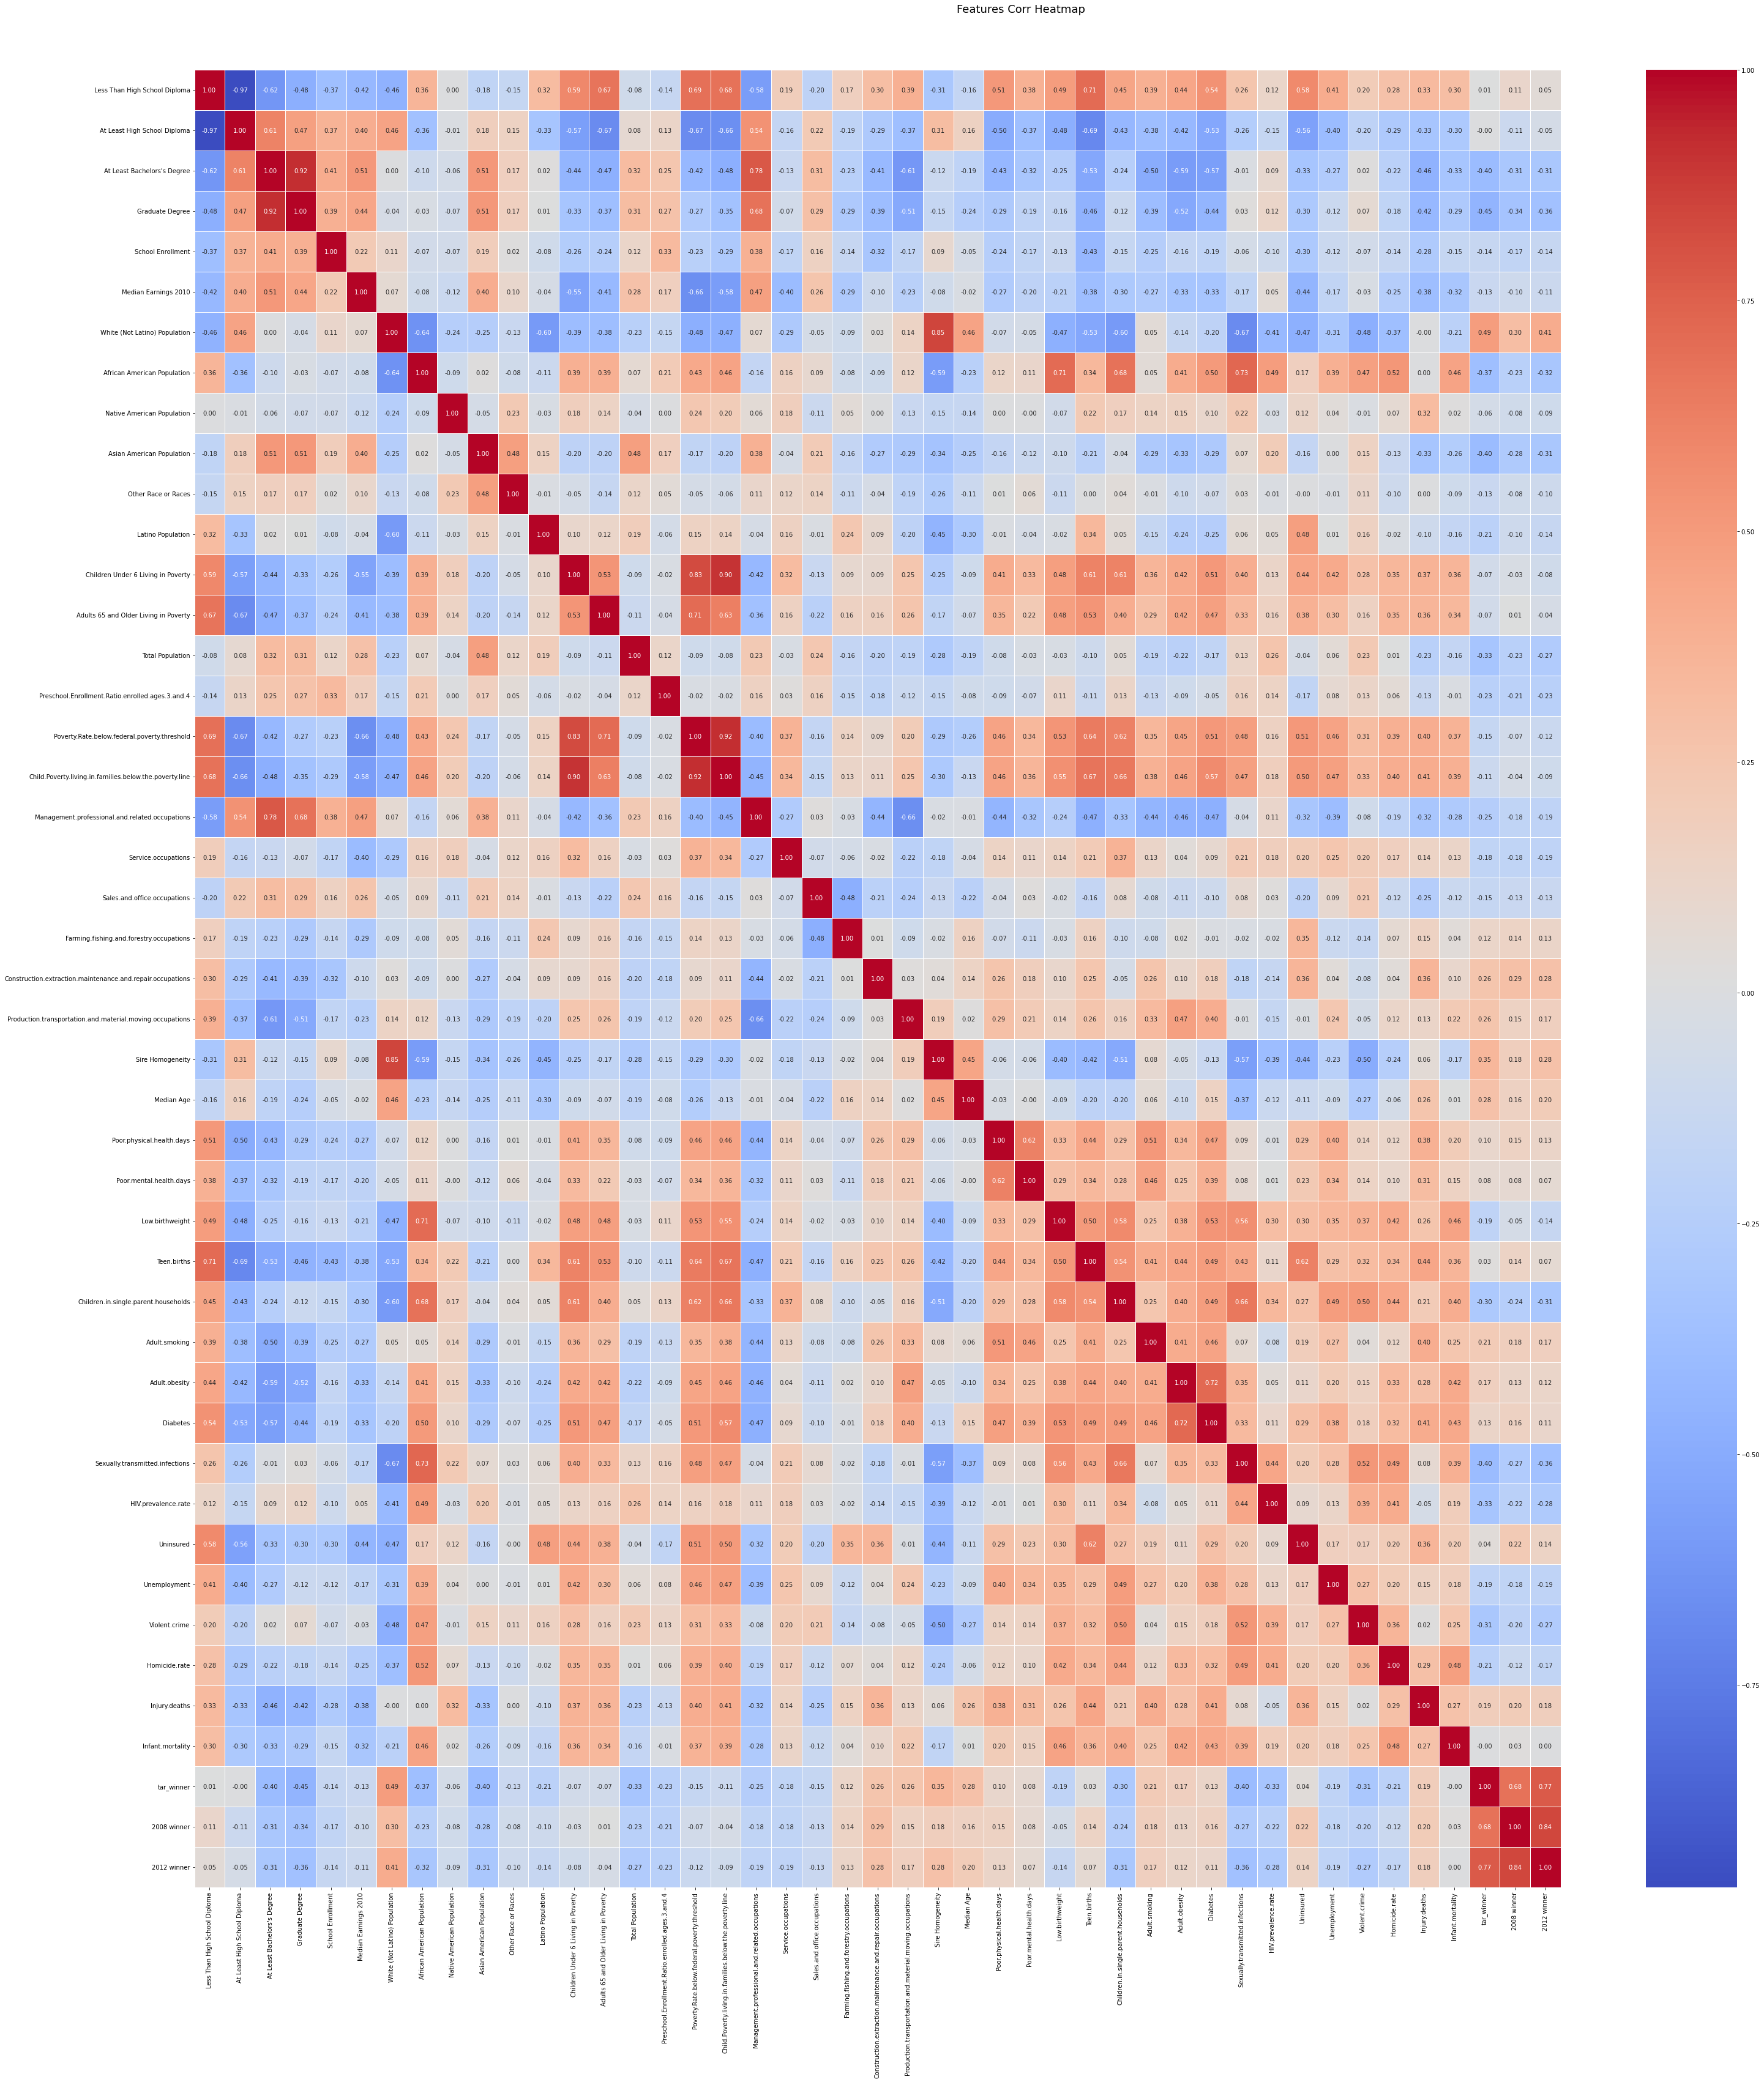

In [37]:
corr = data_3.corr()
f, ax = plt.subplots(figsize = (50, 50))
t = f.suptitle('Features Corr Heatmap', fontsize = 18)
heat_map = sns.heatmap(round(corr, 2), annot = True, ax=ax, cmap = "coolwarm", fmt = '.2f', linewidths = 0.5)
f.subplots_adjust(top = 0.95)

In [38]:
#Histograms
#An array of colors are created
colors = ["#C502FF", "#025AFF"]
#Setting the color palette
sns.set_palette(sns.color_palette(colors))

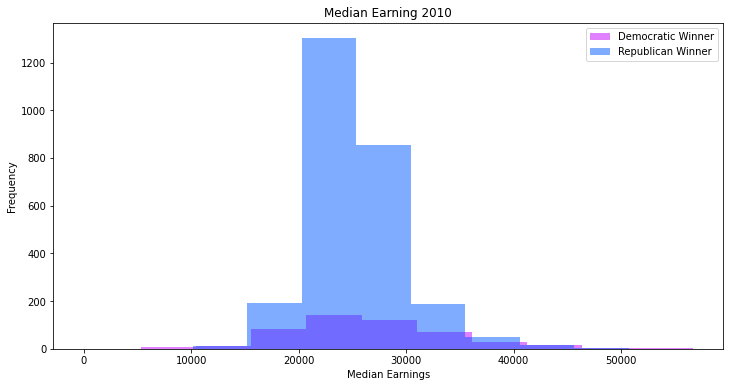

In [39]:
plt.figure(figsize = (12,6))
data_3.groupby('tar_winner')['Median Earnings 2010'].plot(kind = 'hist', bins = 10, alpha = 0.5,
                                                         title = 'Median Earning 2010')
L = plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
#Label
plt.xlabel("Median Earnings")
plt.show()

The median earning falling under 21K and 25K represents the country that have Democratic Winner whereas the range between 20K and 24K represents the countries that have Republican Winner of median earning.

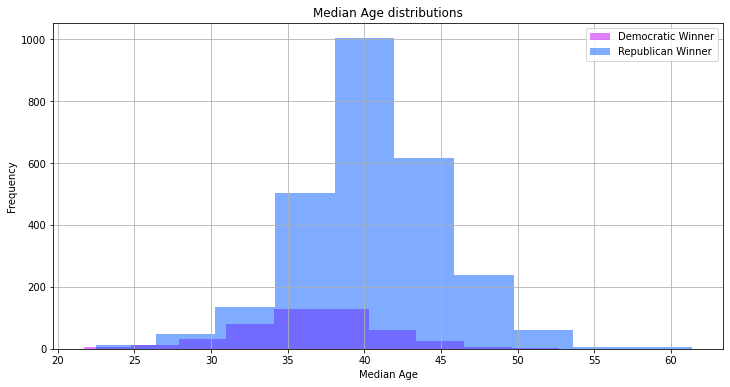

In [40]:
plt.figure(figsize=(12,6))
data_3.groupby('tar_winner')['Median Age'].plot(kind ='hist', bins=10, alpha = 0.5, 
                                                   title='Median Age distributions', legend =True,grid = True)
L=plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
#Label
plt.xlabel("Median Age")
plt.show()

34 and 40 years old is the median age of the democratic winner in major countries whereas the republican winner falls between of median age 38 and 42 years old. 

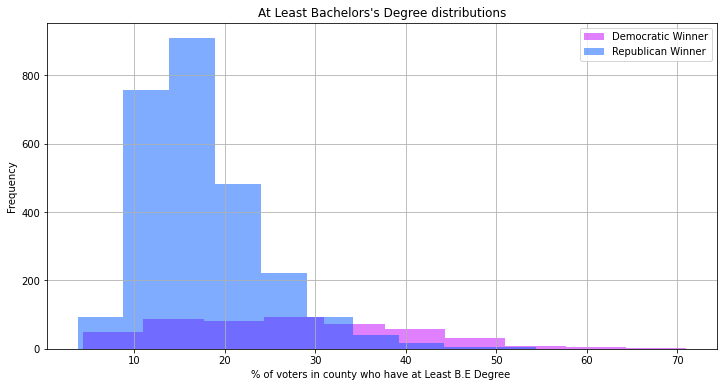

In [41]:
plt.figure(figsize=(12,6))
data_3.groupby('tar_winner')["At Least Bachelors's Degree"].plot(kind ='hist', bins=10, alpha = 0.5, 
                                                                 title="At Least Bachelors's Degree distributions", legend =True,grid = True)
L = plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
plt.xlabel("% of voters in county who have at Least B.E Degree ")
plt.show()

20% and 30% is the range between where the democratic winner have atleast a B.E degree whereas the republican winner that have lower percentage falls under the range between 15% and 20% respectively. Furthermore, the mean is considered to be higher in comparison to the median and mode becuase of the republican winner being skewed right.

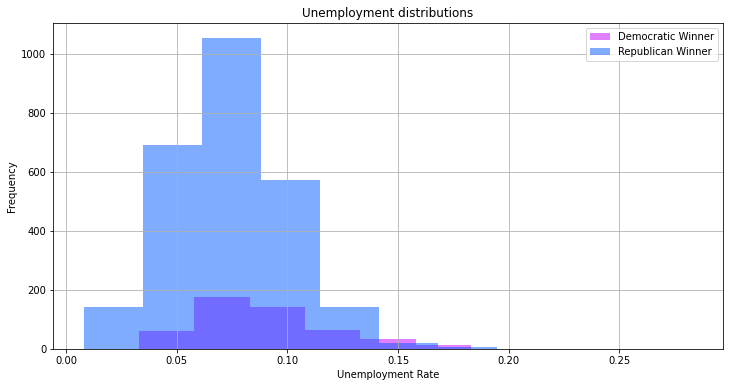

In [42]:
plt.figure(figsize=(12,6))
data_3.groupby('tar_winner')["Unemployment"].plot(kind ='hist', bins=10, alpha = 0.5,
                                                  title="Unemployment distributions", legend =True,grid = True)
L = plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
plt.xlabel("Unemployment Rate")
plt.show()

0.06 and 0.08 is the unemployment rate for democrat winner and same as the republican winner. 

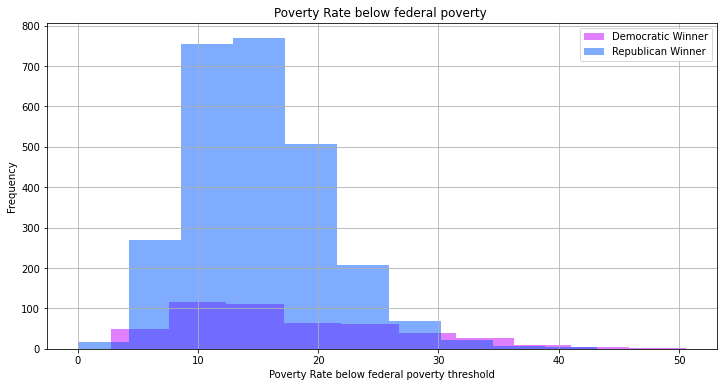

In [43]:
plt.figure(figsize=(12,6))
data_3.groupby('tar_winner')["Poverty.Rate.below.federal.poverty.threshold"].plot(kind ='hist', bins=10, alpha = 0.5, 
                                                                                  title="Poverty Rate below federal poverty ", legend =True,grid = True)
L = plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
plt.xlabel("Poverty Rate below federal poverty threshold")
plt.show()

8% and 12% of the democratic winner lies below the poverty threshold for the majority of countries. Furthermore, 12% and 15% of the republican have higher percentage winner that follows the lower poverty threshold.

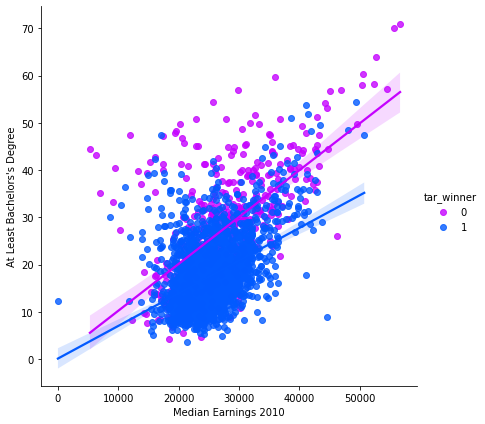

In [44]:
#Scatter Plot
sns.set_palette(sns.color_palette(colors))
sns.lmplot(x="Median Earnings 2010", y="At Least Bachelors's Degree", data=data_3, fit_reg=True, 
           aspect=1, height=6, hue='tar_winner')
plt.show()

Both the Median Earnings and At Least Bachelor's Degree have positively correlated for Democratic and Republican winners. So, as the Bachelor's Degree increases the percentage of the population also increases respectively.

The variables that have a negative correlation are Median Earnings and Unemployment for both the Democratic and Republican winners. So, as the Unemployment rate decreases the median earnings increases.

In [45]:
#Pair Grids
selected_columns = ['Median Age', "At Least Bachelors's Degree", 'Homicide.rate', 
                    'Poverty.Rate.below.federal.poverty.threshold','Unemployment', 'Violent.crime', 'tar_winner']
subset =  data_3[selected_columns]

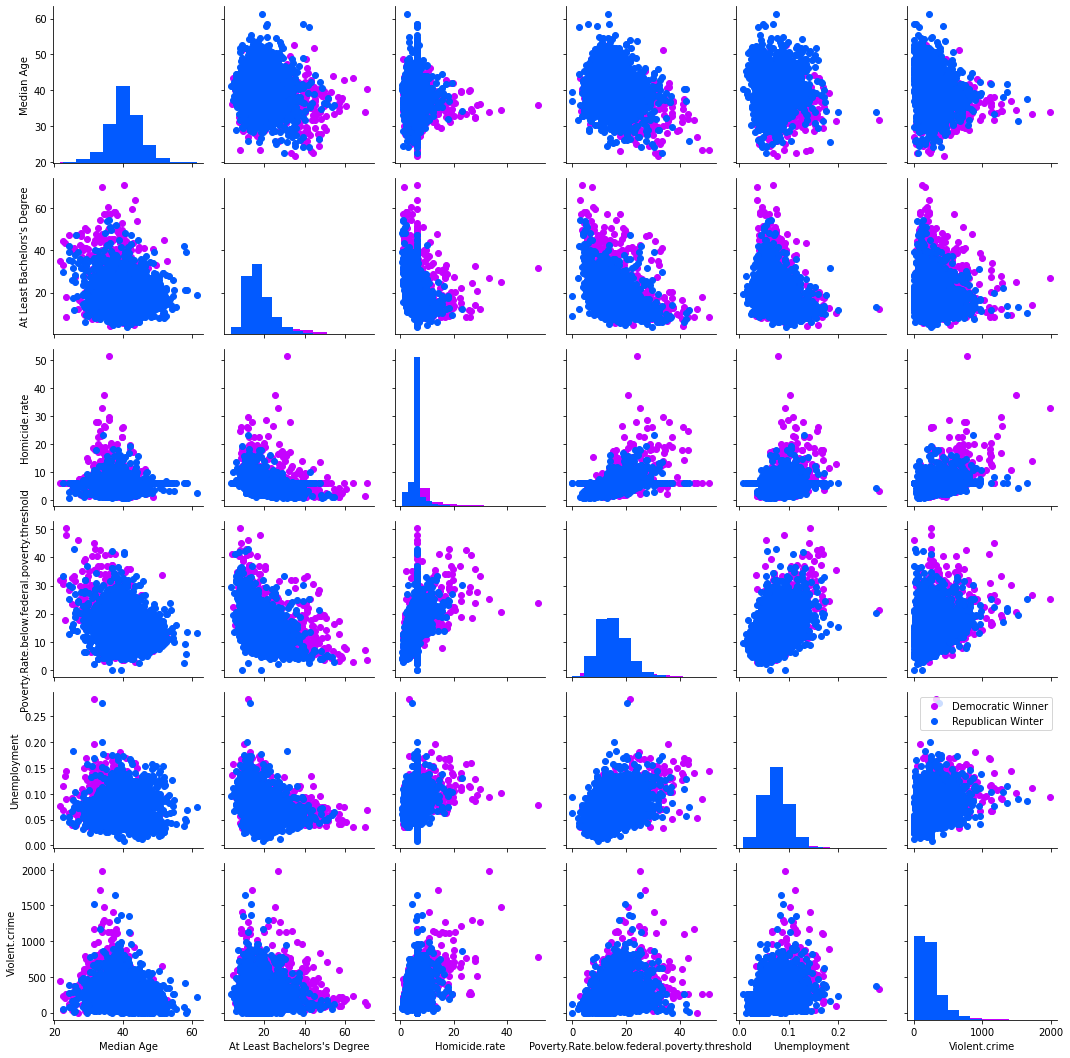

In [46]:
#graph
graph = sns.PairGrid(subset, hue="tar_winner")
graph = graph.map_diag(plt.hist) 
graph = graph.map_offdiag(plt.scatter) 
#Labels
plt.legend(labels=['Democratic Winner', 'Republican Winter'])
plt.show() 

The unemployment rate variables between the democratic and republican winners have a positive correlation and as the unemployment rate increases the poverty rate also increases. Furthermore, the homicide rate and violent crime rate variables have positive correlation for both the democratic and republican winners.

In [47]:
#Splitting the training, validation, and Testing sets
X = data_3.drop(['tar_winner', 'State', 'ST', 'County'], axis = 1)
y = data_3["tar_winner"]

In [48]:
#Random_seed
random_seed = 4055

In [49]:
class_1 = (y == 1).sum()
class_0 = (y == 0).sum()
print('Republican winners of class 1: ',class_1, 
      "  Percent: " , (class_1/3111)*100 )
print('Democrat winners of class 0: ',class_0, 
      "    Percent: " , (class_0/3111)*100)

Republican winners of class 1:  2625   Percent:  84.37801350048217
Democrat winners of class 0:  486     Percent:  15.62198649951784


In [50]:
#Splitting the datasets into training and testing data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=random_seed, test_size=0.20)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, random_state=random_seed, test_size=0.20)

In [51]:
cnt_tr = y_tr.value_counts()
per_tr = y_tr.value_counts(normalize=True)
cnt_val = y_val.value_counts()
per_val = y_val.value_counts(normalize=True)
cnt_te = y_te.value_counts()
per_te = y_te.value_counts(normalize=True)
pd.DataFrame({'Train_Count': cnt_tr,'Val_Count': cnt_val, 'Test_Count': cnt_te, 
              'Train_Percent': per_tr,'Val_Percent': per_val, 'Test_Percent': per_te})

,Train_Count,Val_Count,Test_Count,Train_Percent,Val_Percent,Test_Percent
1,1679,420,526,0.843719,0.843373,0.844302
0,311,78,97,0.156281,0.156627,0.155698


In [52]:
#Using the training and validation sets in model fitting and model comparison
#Standardizing the data
std_scal = preprocessing.StandardScaler()
X_std_scal = std_scal.fit_transform(X_tr).tolist()
#Performing the fit transform
X_val_std_scal = std_scal.fit_transform(X_val).tolist()
X_test_std_scal = std_scal.fit_transform(X_te).tolist()
skf = StratifiedKFold(n_splits=5, random_state= None)
skf.get_n_splits(X_std_scal, y_tr)

5

# Machine Learning Models

# 1. Decision Tree

In [53]:
#Importing the necessary packages
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [54]:
#Computing the accuracy
def computeAccuracy(myY_true, myY_pred):
    return metrics.accuracy_score(y_true = myY_true, y_pred = myY_pred)

In [55]:
def showMetrics(myTitle, myY_true, myY_pred):
    confusion_matrix =  pd.crosstab(index=np.ravel(myY_true), columns=myY_pred.ravel(),
                                    rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title(myTitle, fontsize = 15)
    plt.show()
    print(metrics.classification_report(y_true = myY_true, y_pred = myY_pred))

In [56]:
def plotValues(myTitle, myLabelX, myScores, myXList):
    plt.figure(figsize=(10,5))
    plt.title(myTitle)
    plt.plot(myScores, 'go--',label = 'validation')
    plt.xticks(np.arange(len(myXList)), myXList, rotation = 45)
    plt.xlabel(myLabelX)
    plt.ylabel('Accuracy Scores')
    plt.legend()
    plt.show()

In [57]:
#Decision Tree
data = DecisionTreeClassifier(random_state=random_seed)
data.fit(X_tr, y_tr)
pred_train = data.predict(X_tr)
pred_val = data.predict(X_val)
#Training Accuracy
print("Accuracy Scores for training: ",computeAccuracy(y_tr, pred_train))
#Validation Accuracy
print("Accuracy Scores for validation: ",computeAccuracy(y_val, pred_val))

Accuracy Scores for training:  1.0
Accuracy Scores for validation:  0.9538152610441767


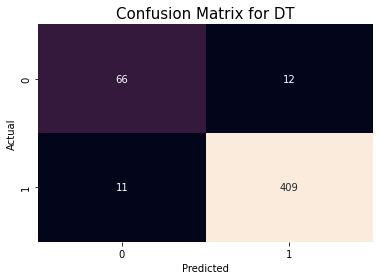

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        78
           1       0.97      0.97      0.97       420

    accuracy                           0.95       498
   macro avg       0.91      0.91      0.91       498
weighted avg       0.95      0.95      0.95       498



In [58]:
#Confusion Matrix
showMetrics("Confusion Matrix for DT", y_val, pred_val)

The accuracy rate of traning and validation set are 7% that tells us that the default model is overfitting. The specificity is lower than the recall and precision. Furthermore, the hyperparameter tuning is performed and Gridsearch CV is done in order to find the best parameters.

In [59]:
#Finding the minimum splits for the best value
Min_split_list = [10, 30, 50, 100, 150, 200, 300, 400, 500]
acc_valid = []
for ms in Min_split_list:
    data = DecisionTreeClassifier(min_samples_split= ms, random_state = 42)
    data.fit(X_tr, y_tr)
    pred_train = data.predict(X_tr)
    score_valid= cross_val_score(data, X_tr, y_tr, 
                                 scoring = "accuracy", cv =5 )
    acc_valid.append(score_valid.mean())
print("Accuracy score")
acc_valid

Accuracy score


[0.9412060301507539,
 0.9472361809045227,
 0.9447236180904524,
 0.9482412060301508,
 0.9346733668341709,
 0.9346733668341709,
 0.9241206030150753,
 0.9226130653266331,
 0.9226130653266331]

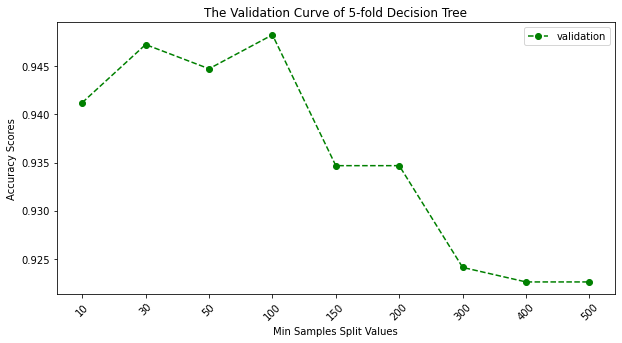

In [60]:
plotValues("The Validation Curve of 5-fold Decision Tree", 'Min Samples Split Values', acc_valid, Min_split_list )

100 is the best min split

Grid Search CV

In order to improve the performance, the class_weight is computed. Furthermore, the different class_weights are specified for gridSearch so that the higher class_weight of class 0 will be relative to class 1

In [61]:
Min_split_list = [50] 
MD_list = [2, 3, 5, 7, 10]
criterion_list = ['gini', 'entropy']
CW_list = [{ 0:1, 1: 1},{0:1.5, 1:1},{0:2, 1:1}, {0:3, 1:0.5} ]
params = {"criterion": criterion_list, 'min_samples_split': Min_split_list,"class_weight": CW_list,
         'max_depth': MD_list, 'random_state': [54]}
dec_tr = DecisionTreeClassifier()
grid_dec_tr = GridSearchCV(estimator=dec_tr, param_grid=params, cv=5, verbose =1, scoring="accuracy", n_jobs=-1)

In [62]:
grid_dec_tr.fit(X_tr, y_tr)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1},
                                          {0: 2, 1: 1}, {0: 3, 1: 0.5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_split': [50], 'random_state': [54]},
             scoring='accuracy', verbose=1)

In [63]:
#Best Parameter and estimators are printed
print(grid_dec_tr.best_params_)
print(grid_dec_tr.best_estimator_)

{'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 50, 'random_state': 54}
DecisionTreeClassifier(class_weight={0: 1, 1: 1}, max_depth=3,
                       min_samples_split=50, random_state=54)


In [64]:
#Fitting the gridsearch model
dec_tre_gs = DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='entropy',
                       max_depth=5, min_samples_split=50, random_state=54)
dec_tre_gs.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='entropy',
                       max_depth=5, min_samples_split=50, random_state=54)

In [65]:
#The accuracy rates are computed
pred_train = dec_tre_gs.predict(X_tr)
pred_val = dec_tre_gs.predict(X_val)
#Training Accuracy
print("Accuracy Scores for training",computeAccuracy(y_tr, pred_train))
#Validation Accuracy
print("Accuracy Scores for Validation",computeAccuracy(y_val, pred_val))

Accuracy Scores for training 0.9628140703517588
Accuracy Scores for Validation 0.9658634538152611


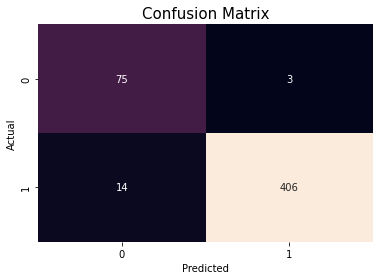

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        78
           1       0.99      0.97      0.98       420

    accuracy                           0.97       498
   macro avg       0.92      0.96      0.94       498
weighted avg       0.97      0.97      0.97       498



In [66]:
showMetrics("Confusion Matrix", y_val, pred_val)

The best model has higher accuracy of 97%, so as the weighted average F1-score, and recall is considerably higher in comparison to the default model. Furthermore, the gridsearchCV model is able to predict both the class 0 and class 1 and is also less overfitting.

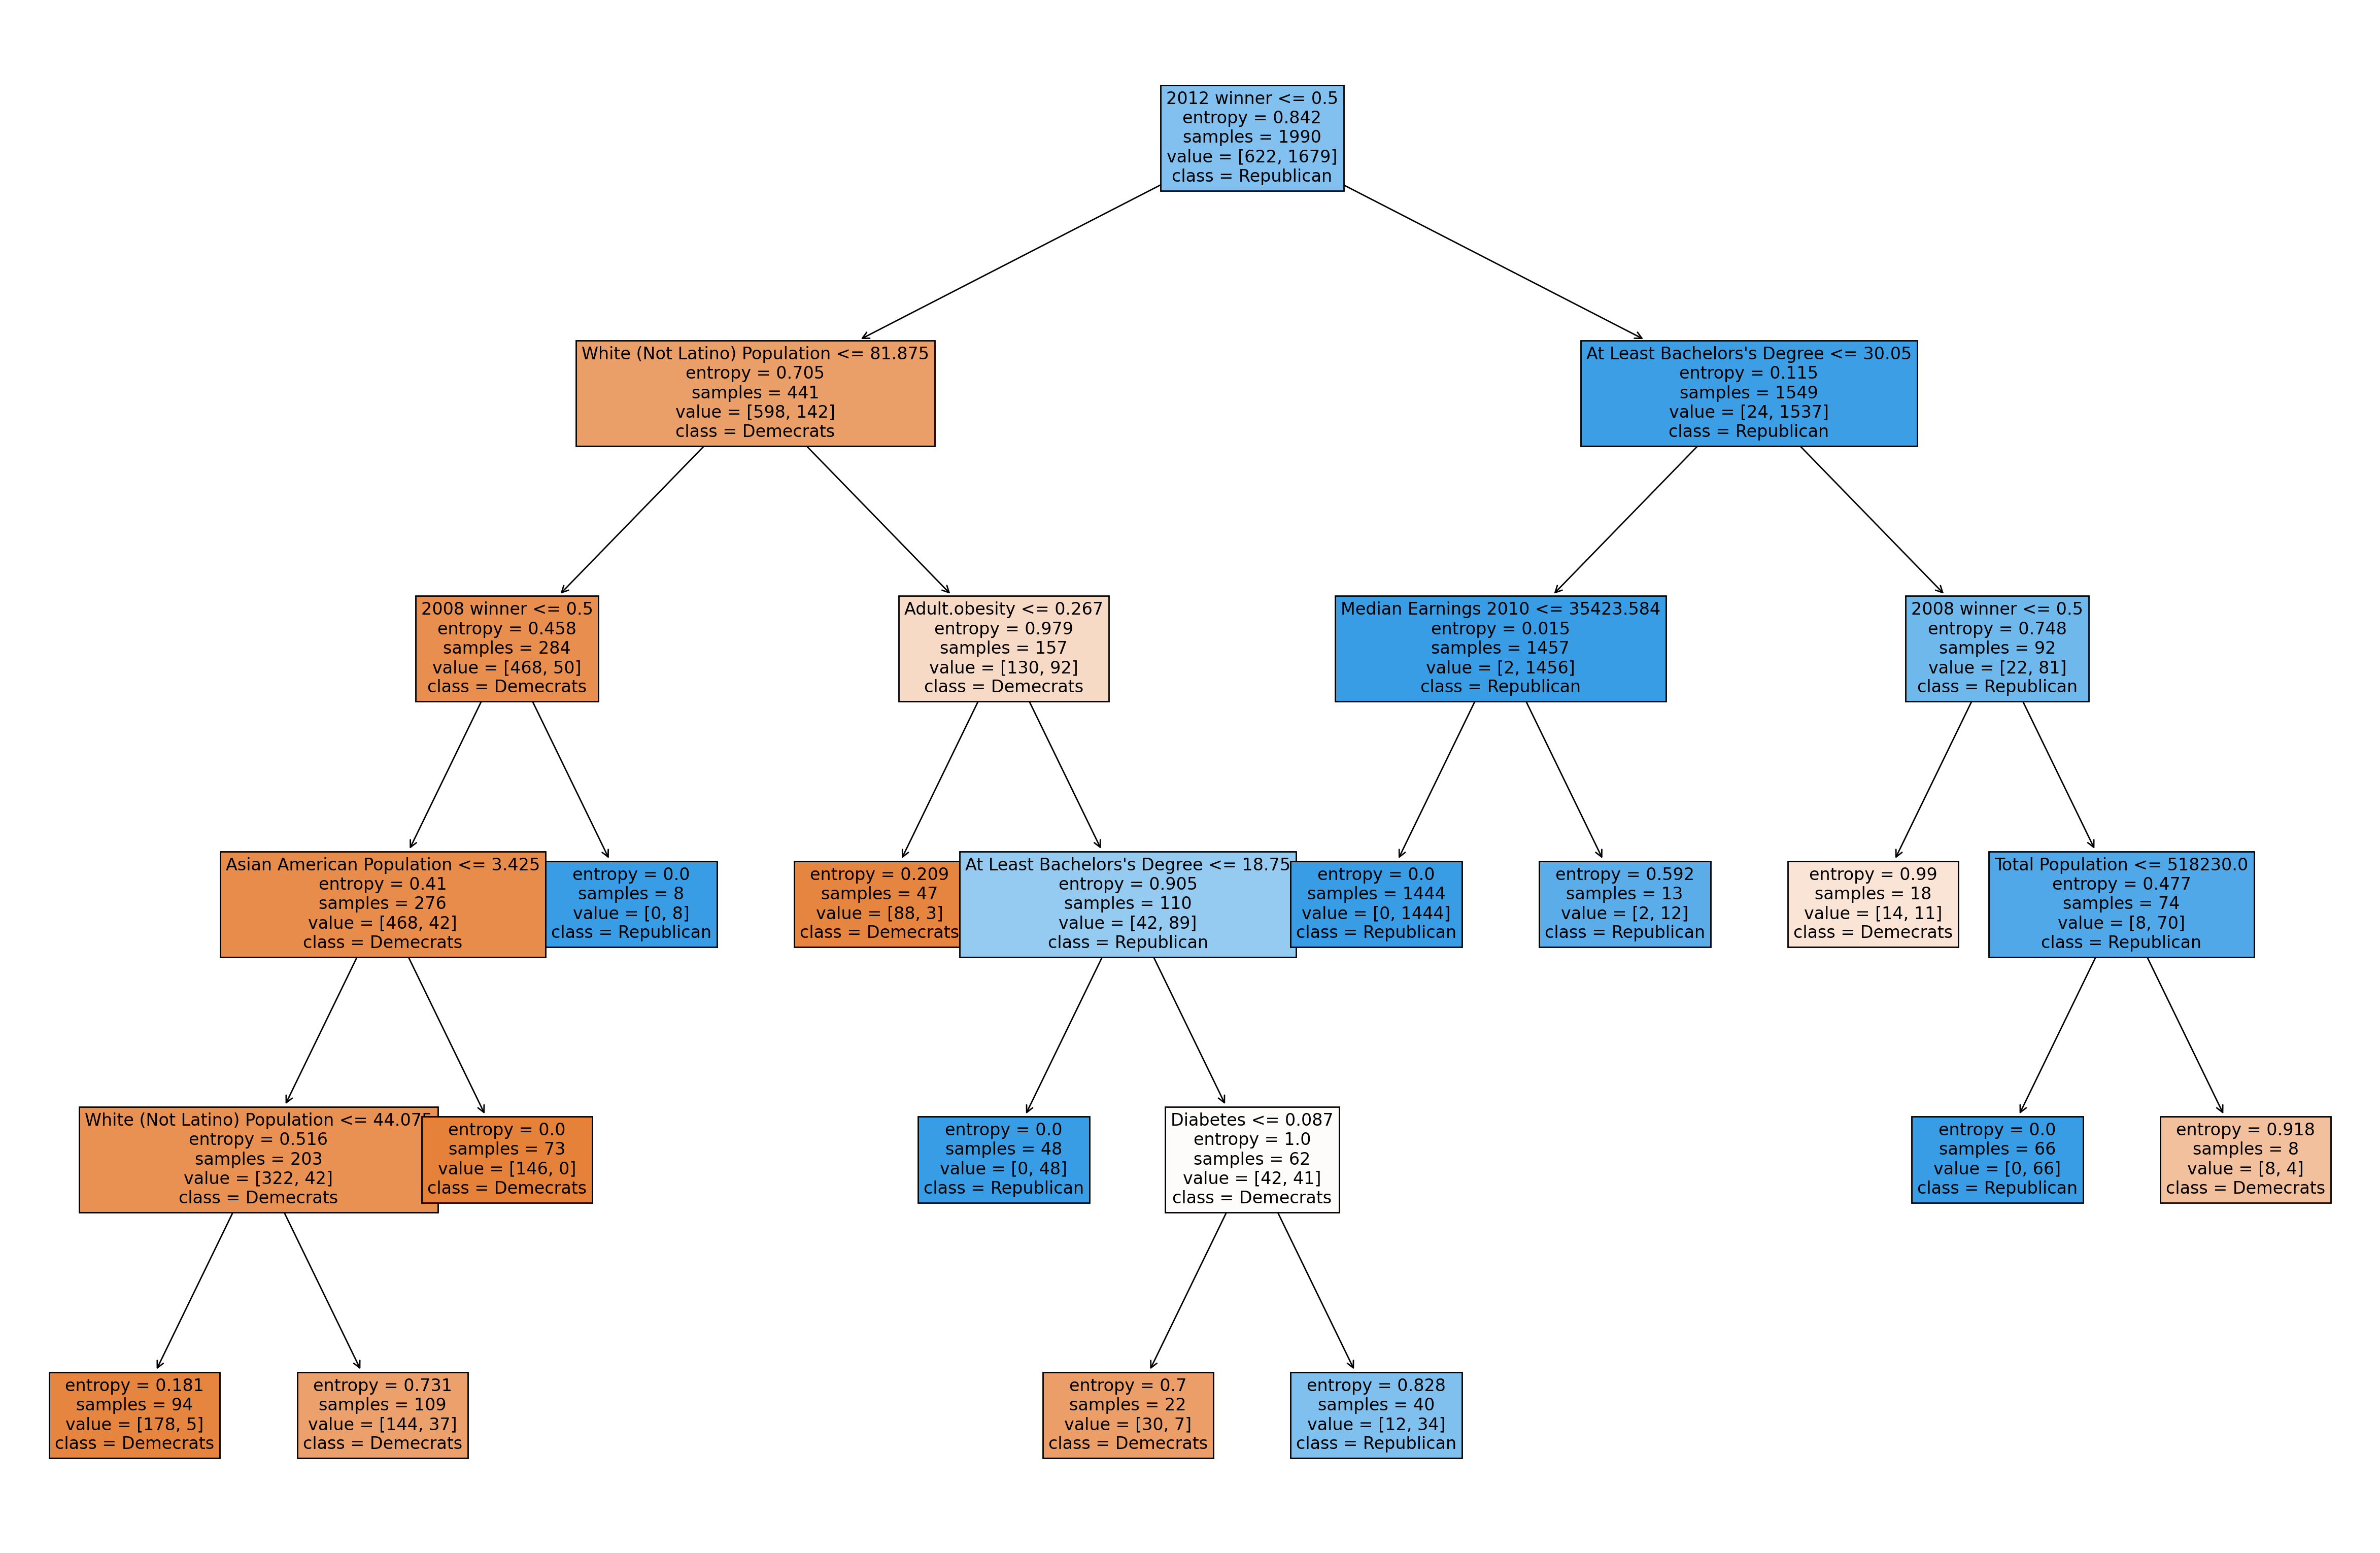

In [67]:
#Importing the packages
from sklearn import tree
fn = X_tr.columns
cn = ['Demecrats','Republican']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,20), dpi=200)
tree.plot_tree(dec_tre_gs,feature_names = fn, class_names=cn, filled = True, fontsize=12);

We can conclude that the results from 2012 is considered as the important variable for the election result from the decision tree classifier. However, if the median age of the voters is less than 38.15 years ols, the democratic candidate will win the election. Also, if the asian american voters with 2.5% less are likely to win the election, whereas the white voters are less than 47%, that the republican candidate have higher chance of winning the election. The republicans are also likely to win the election with the county that has less than 18% of bachelor's degree since education level is an important factor during elections.

In [68]:
#Gathering the features that are important from the decision tree
imp = dec_tre_gs.feature_importances_
feat_importances = pd.Series(imp, index=X_tr.columns)
feat_importances.nlargest(10)

2012 winner                      0.751630
At Least Bachelors's Degree      0.070223
White (Not Latino) Population    0.054719
Adult.obesity                    0.048453
2008 winner                      0.026138
Total Population                 0.015923
Asian American Population        0.013076
Diabetes                         0.011557
Median Earnings 2010             0.008280
Less Than High School Diploma    0.000000
dtype: float64

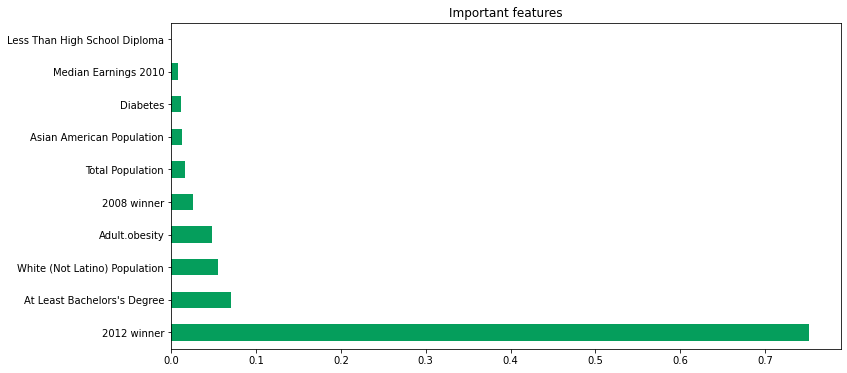

In [69]:
#Setting the color palette
colors = ["#059e5c"]
#Using the seaborn
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12,6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Important features")
plt.show()

The 2012 winner variable is considered the top most variable feature with median age as the second most variable. Other features that impacts the target variable are race, occupations, and education. Furthermore, the health condiiton, and factors like race and education level also have more impact on the election winner.

# 2. Logistic Regression

In [70]:
#Importing the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [71]:
def evaluate_results(test, train, train_target, test_target, model):
    pred_test = model.predict(test)
    probs_test = model.predict_proba(test)[:, 1]
    probs_train = model.predict_proba(train)[:, 1]
    print()
    print('Test Accuracy = {0:.4f}'.format(model.score(test, test_target)))
    print('Train Accuracy = {0:.4f}'.format(model.score(train, train_target)))
    print()
    print('Train ROC AUC Score: {0:.4f}'.format(roc_auc_score(train_target, probs_train)))
    print('Test ROC AUC  Score: {0:.4f}'.format(roc_auc_score(test_target, probs_test)))
    print()
    print('Test Recall: {0:.4f}'.format(recall_score(test_target, pred_test)))
    print('Test Precision: {0:.4f}'.format(precision_score(test_target, pred_test)))
    print()
    fpr, tpr, _ = roc_curve(test_target,  probs_test)
    auc = roc_auc_score(test_target, probs_test)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves');
    plt.show()

In [72]:
def plot_coeff(model, test_data):
    coef_dict = {}
    for coef, feat in zip(model.coef_[0,:], test_data):
        coef_dict[feat] = coef    
    # sorted dict    
    {k: v for k, v in sorted(coef_dict.items(), reverse=True, key=lambda item: item[1])}
    
    coeff_df = pd.DataFrame(coef_dict.items(), index = coef_dict.keys())
    print()
    print(coeff_df.iloc[:,1])
    coeff_df[0:].plot(kind = 'barh', 
                      figsize = (10,10),
                      title = 'Coefficients')

In [73]:
#The classifier is initialized
base_clf = LogisticRegression(random_state = random_seed)
#Fitting the model
base_clf.fit(X_tr, y_tr)

LogisticRegression(random_state=4055)


Test Accuracy = 0.9056
Train Accuracy = 0.8975

Train ROC AUC Score: 0.8883
Test ROC AUC  Score: 0.8866

Test Recall: 0.9881
Test Precision: 0.9081



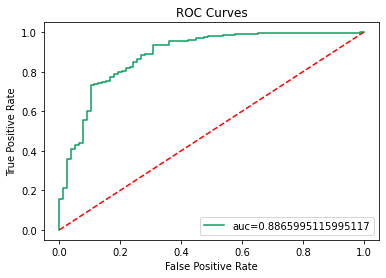

In [74]:
#The results are evaluated
evaluate_results(X_val, X_tr, y_tr, y_val, base_clf)

In [75]:
#The metrics are displayed
test_pred = base_clf.predict(X_val)
print(classification_report(y_val, test_pred))
print('Accuracy =', round(metrics.balanced_accuracy_score(y_val, test_pred),2))
print('Specificity = ',round(1 - metrics.recall_score(y_val, test_pred),2))

              precision    recall  f1-score   support

           0       0.88      0.46      0.61        78
           1       0.91      0.99      0.95       420

    accuracy                           0.91       498
   macro avg       0.89      0.72      0.78       498
weighted avg       0.90      0.91      0.89       498

Accuracy = 0.72
Specificity =  0.01


We can see that the accuracy being 90% whereas the recall is considerably lower so the hyperparameter tuning is performed.

In [76]:
#HyperParameter Tuning
#Random Search is performed
#Random search with hyperparameter
param_grid = {
    'solver': ['lbfgs','liblinear','sag','saga'],
    'penalty': ['l1','l2'],
    'tol': list(np.arange(.00001,.1, .005).astype(float)),
    'C': list(np.arange(.0001,.1, .007).astype(float)),
}
#Random search with the estimator
estimator = LogisticRegression(random_state = random_seed)
#New model is created
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        cv = 10, n_iter = 10, verbose = 1, random_state=random_seed)
#Different models are fitted for the parameters
rs.fit(X_tr, np.ravel(y_tr))
#Gathering the best parameters
rs.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'tol': 0.02001,
 'solver': 'liblinear',
 'penalty': 'l1',
 'C': 0.08410000000000001}

In [77]:
#Performing Grid Search with all parameters
param_grid = {
    'tol': list(np.arange(.007,.13, .01).astype(float)),
    'C': list(np.arange(.04,.14, .01).astype(float))
}
#Searching through the grid
tuned_lr = LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state = random_seed)
gs = GridSearchCV(tuned_lr, param_grid, verbose=1, cv=5, n_jobs = -1)
gs.fit(X_tr, np.ravel(y_tr))

Fitting 5 folds for each of 130 candidates, totalling 650 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', random_state=4055,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.04, 0.05, 0.060000000000000005, 0.07,
                               0.08000000000000002, 0.09000000000000001, 0.1,
                               0.11000000000000001, 0.12000000000000002,
                               0.13000000000000003],
                         'tol': [0.007, 0.017, 0.027000000000000003,
                                 0.037000000000000005, 0.04700000000000001,
                                 0.05700000000000001, 0.06700000000000002,
                                 0.07700000000000001, 0.08700000000000002,
                                 0.09700000000000003, 0.10700000000000003,
                                 0.11700000000000002, 0.12700000000000003]},
             verbose=1)

In [78]:
#Best Parameters
print('Best parameters:', gs.best_params_ )
print('Best Score:', gs.best_score_)

Best parameters: {'C': 0.09000000000000001, 'tol': 0.007}
Best Score: 0.9633165829145728


The randomized search is done as the first step that allows to narrow the search for grid after that the grid search is performed with the main parameters as C and tol that represents the regularization strength and tolerance. 


Test Accuracy = 0.9739
Train Accuracy = 0.9643

Train ROC AUC Score: 0.9920
Test ROC AUC  Score: 0.9955

Test Recall: 0.9857
Test Precision: 0.9834



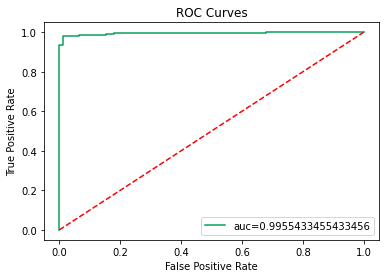

In [79]:
#The best fit model is evaluated
#Model is tuned
tuned_lr = LogisticRegression(solver = 'liblinear', 
                              penalty = 'l1', 
                              C = .06,
                              tol = .007,
                              random_state = random_seed)
#Fitting the model
tuned_lr.fit(X_tr, y_tr)
#The results are evaluated
evaluate_results(X_val, X_tr, y_tr, y_val, tuned_lr)

In [80]:
#The metrics are displayed
test_pred = tuned_lr.predict(X_val)
print(classification_report(y_val, test_pred))
print('Accuracy =', round(metrics.balanced_accuracy_score(y_val, test_pred),2))
print('Specificity = ',round(1 - metrics.recall_score(y_val, test_pred),2))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        78
           1       0.98      0.99      0.98       420

    accuracy                           0.97       498
   macro avg       0.95      0.95      0.95       498
weighted avg       0.97      0.97      0.97       498

Accuracy = 0.95
Specificity =  0.01


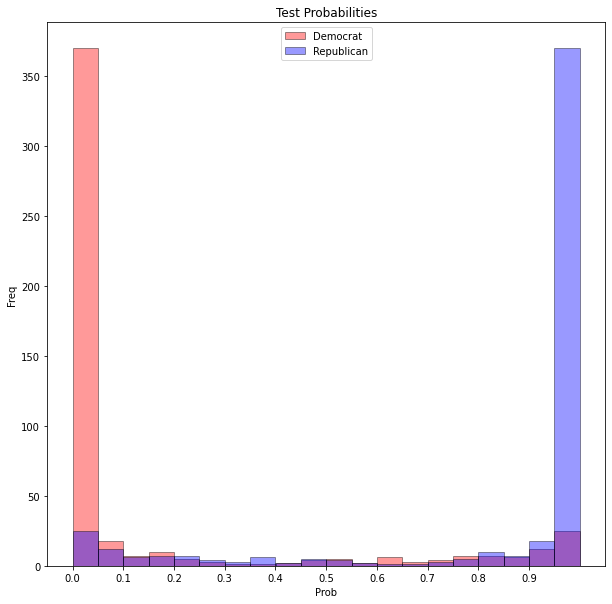

In [81]:
#The probabilities b/w Democratic and Republic are plotted
test_probs = tuned_lr.predict_proba(X_val)
#Democrat
#Republic
Democrat = list(test_probs[:,0])
Republican = list(test_probs[:,1])
plt.figure(figsize = (10,10))
#Histogram for the Democrat
plt.hist(Democrat, 
              color = 'red', 
              edgecolor = 'black', 
              bins = 20,
              alpha = .4,
              label = 'Democrat')
#Histogram for the Republican
plt.hist(Republican, 
              color = 'blue', 
              edgecolor = 'black', 
              bins = 20,
              alpha = .4,
              label = 'Republican')
plt.legend(loc = 'upper center')
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel('Prob')
plt.ylabel('Freq')
plt.title('Test Probabilities')
plt.show()

The accuracy and the recall have been improved and increased to 97% and 90% with the other metrics also that was able to predict the winning candidate during the election. This plot suggests how well the model is predicting each class.


Less Than High School Diploma                                -0.001556
At Least High School Diploma                                  0.004704
At Least Bachelors's Degree                                  -0.114099
Graduate Degree                                              -0.105860
School Enrollment                                             0.012067
Median Earnings 2010                                          0.000003
White (Not Latino) Population                                 0.039442
African American Population                                  -0.042375
Native American Population                                   -0.003731
Asian American Population                                    -0.022461
Other Race or Races                                          -0.009399
Latino Population                                            -0.019292
Children Under 6 Living in Poverty                            0.013280
Adults 65 and Older Living in Poverty                        -0.023518
Total

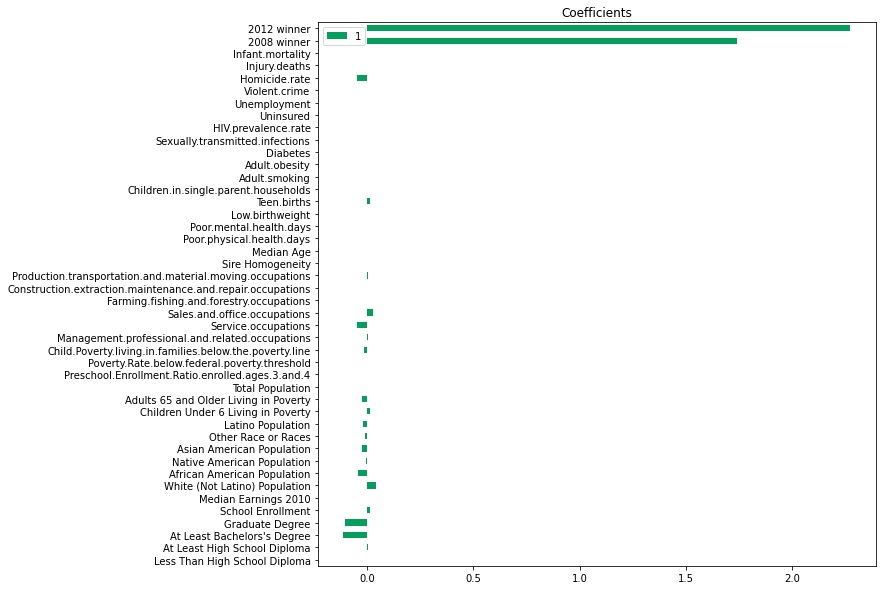

In [82]:
#Feature Exploration and Co-efficients
plot_coeff(tuned_lr, X_val)

The above model with the plot used the l1 regularization, the number of model can be reduced considerably. The variables 'At least a Bachelor's Degree', 'Party Choice (2008)', 'Party Choice (2012)'.

# 3. Random Forest

In [83]:
#Importing the packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [84]:
#The evaluation of model uses the key fns that creates the fn
def evaluation_metrics(X_train, X_test, y_train, y_test, model):
    pred_test = model.predict(X_test)
#Accuracy
    print('Training Accuracy = {0:.3f}'.format(model.score(X_train, y_train)))
    print('Validation Accuracy = {0:.3f}'.format(model.score(X_test, y_test)))
#Recall
    print('Recall = {0:.3f}'.format(recall_score(y_test, pred_test)))
#Precision
    print('Precision = {0:.3f}'.format(precision_score(y_test, pred_test)))
#F1-Score
    print('F1 Score = {0:.3f}'.format(f1_score(y_test, pred_test)))
    print()
#Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, pred_test))

In [85]:
def plot_coeff(model, test_data):
    coef_dict = {}
    for coef, feat in zip(model.coef_[0,:], test_data):
        coef_dict[feat] = coef        
    {k: v for k, v in sorted(coef_dict.items(), reverse=True, key=lambda item: item[1])}
    coeff_df = pd.DataFrame(coef_dict.items(), index = coef_dict.keys())
    print()
    print(coeff_df.iloc[:,1])
    coeff_df[0:].plot(kind = 'barh', 
                      figsize = (10,10),
                      title = 'Coefficients')

In [86]:
#Initial Model
rnd_for = RandomForestClassifier(random_state=random_seed)
rnd_for.fit(X_tr, y_tr)

RandomForestClassifier(random_state=4055)

In [87]:
evaluation_metrics(X_tr, X_val, y_tr, y_val, rnd_for)

Training Accuracy = 1.000
Validation Accuracy = 0.988
Recall = 0.995
Precision = 0.991
F1 Score = 0.993

Confusion Matrix:
[[ 74   4]
 [  2 418]]


In [88]:
#Performing Hyper Parameter Tuning
#Random search with hyperparameter 
parameters= {'criterion':['gini', 'entropy'],'min_samples_split':[10,25,50,100,250,500,1000] ,
            'max_depth':[3,5,7,10,25,50,100],
            'n_estimators':[5,10,25,25,50], 'max_features':['auto', 'sqrt', 'log2']}
#Random Search with estimator
estimator = RandomForestClassifier(random_state = random_seed)
#Random Search model is created
rs = RandomizedSearchCV(estimator, parameters, n_jobs = -1, 
                        cv = 10, n_iter = 10, verbose = 1, random_state=random_seed)
rs.fit(X_tr, np.ravel(y_tr))
rs.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 25,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [89]:
#Performing the grid search for the random forest
parameters={"min_samples_split":[10,25,50,100,250,500,1000] ,
            'max_depth':[3,5,7,10,25,50,100],
            'n_estimators':[5,10,25,25,50]}

In [90]:
tuned_rf = RandomForestClassifier(criterion= 'entropy' ,max_features= 'auto',random_state = random_seed)
RF_grid_cv=GridSearchCV(estimator=tuned_rf,param_grid= parameters, cv= 5,scoring = 'recall')
#The grid is fitted and CV search is performed
RF_grid_cv.fit(X_tr,y_tr)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_features='auto',
                                              random_state=4055),
             param_grid={'max_depth': [3, 5, 7, 10, 25, 50, 100],
                         'min_samples_split': [10, 25, 50, 100, 250, 500, 1000],
                         'n_estimators': [5, 10, 25, 25, 50]},
             scoring='recall')

In [91]:
#The parameters with the best combinations are returned
RF_grid_cv.best_estimator_ 

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       min_samples_split=1000, n_estimators=5,
                       random_state=4055)

In [92]:
#The best fit model is evaluated

final_Rnd_For=RandomForestClassifier(criterion= 'entropy' ,max_features= 'auto',max_depth=3, min_samples_split=1000
                                ,n_estimators=5,random_state = random_seed)
final_Rnd_For=final_Rnd_For.fit(X_tr,y_tr)

In [93]:
evaluation_metrics(X_tr, X_val, y_tr, y_val, final_Rnd_For)

Training Accuracy = 0.844
Validation Accuracy = 0.843
Recall = 1.000
Precision = 0.843
F1 Score = 0.915

Confusion Matrix:
[[  0  78]
 [  0 420]]


In [94]:
#Feature Exploration and Co-efficients
rnd_for_feat = final_Rnd_For.feature_importances_
rnd_for_feat_importances = pd.Series(rnd_for_feat, index=X_tr.columns)
rnd_for_feat_importances

Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000000
At Least Bachelors's Degree                                   0.101803
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
White (Not Latino) Population                                 0.098197
African American Population                                   0.000000
Native American Population                                    0.000000
Asian American Population                                     0.000000
Other Race or Races                                           0.000000
Latino Population                                             0.000000
Children Under 6 Living in Poverty                            0.000000
Adults 65 and Older Living in Poverty                         0.000000
Total 

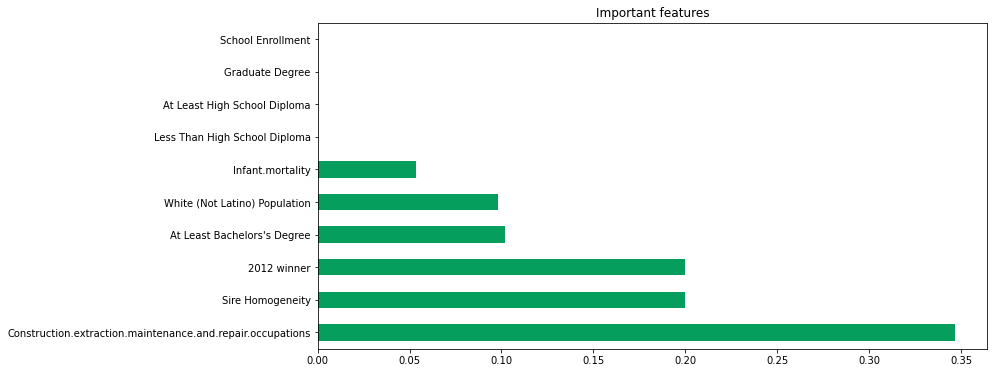

In [95]:
#Top features are plotted
colors = ["#059e5c"]
#Color Palette is set
#Using the seaborn technique
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12,6))
rnd_for_feat_importances.nlargest(10).plot(kind='barh')
plt.title("Important features")
plt.show()

Here, we can conclude that the most important variable are voters, race, and 2012 winner for the election. Race, occupations, and education level features are also considered to have major impact on the target variable.

# 4. K-Nearest Neighbor

In [96]:
#Importing the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import neighbors
from sklearn.inspection import permutation_importance
from matplotlib.colors import ListedColormap

In [97]:
#The evaluation of model uses the key fns that creates the fn
def evaluation_metrics(X_train, X_test, y_train, y_test, model):
    pred_test = model.predict(X_test)
#Accuracy
    print('Training Accuracy = {0:.3f}'.format(model.score(X_train, y_train)))
    print('Validation Accuracy = {0:.3f}'.format(model.score(X_test, y_test)))
#Recall
    print('Recall = {0:.3f}'.format(recall_score(y_test, pred_test)))
#Precision
    print('Precision = {0:.3f}'.format(precision_score(y_test, pred_test)))
#F1-Score
    print('F1 Score = {0:.3f}'.format(f1_score(y_test, pred_test)))
    print()
#Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, pred_test))

In [98]:
#Standardize
X_train_std_scal = X_std_scal

In [99]:
#Number of Neighbors
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
acc_train_ss = []
acc_val_ss = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
#Fitting the model
    clf.fit(X_train_std_scal, y_tr) 
#Predicting the training
    pred_train_ss = clf.predict(X_train_std_scal) 
    acc_train_ss.append(metrics.accuracy_score(y_true = y_tr, y_pred = pred_train_ss)) 
#Predicting the Validation
    pred_val_ss = clf.predict(X_val_std_scal) 
    acc_val_ss.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_val_ss))

In [100]:
#Training Accuracy
acc_train_ss

[1.0,
 0.9763819095477387,
 0.9738693467336683,
 0.9698492462311558,
 0.963819095477387,
 0.963819095477387,
 0.9597989949748744,
 0.9587939698492463,
 0.9592964824120603,
 0.9532663316582914,
 0.9477386934673366,
 0.9447236180904522,
 0.9437185929648241,
 0.9165829145728643]

In [101]:
#Validation Accuracy
acc_val_ss

[0.9678714859437751,
 0.9678714859437751,
 0.9678714859437751,
 0.9718875502008032,
 0.9738955823293173,
 0.9678714859437751,
 0.9698795180722891,
 0.9658634538152611,
 0.9618473895582329,
 0.9598393574297188,
 0.9618473895582329,
 0.9578313253012049,
 0.9558232931726908,
 0.9236947791164659]

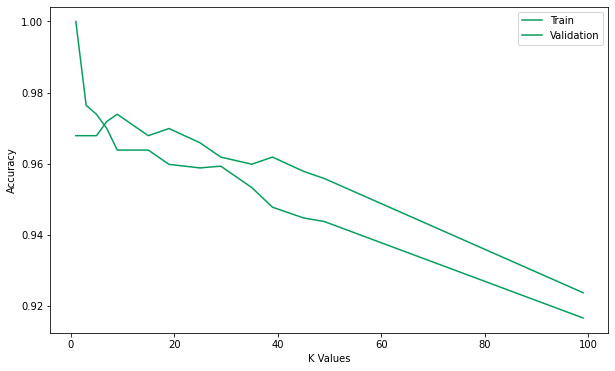

In [102]:
plt.figure(figsize=(10,6))
plt.plot(K_list, acc_train_ss, label='Train')
plt.plot(K_list, acc_val_ss, label='Validation')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see from the plot that the accuracy increases at k-value of 35 with 97% respectively.

In [105]:
#K=35
K_neigh = KNeighborsClassifier(n_neighbors=35)
K_neigh.fit(X_train_std_scal, y_tr)
pred_train_ss = K_neigh.predict(X_train_std_scal)
print("Training Accuracy", metrics.accuracy_score(y_true = y_tr, y_pred = pred_train_ss))
pred_val_ss = K_neigh.predict(X_val_std_scal)
print("Validation Accuracy", metrics.accuracy_score(y_true = y_val, y_pred = pred_val_ss))
print(metrics.classification_report(y_true = y_val, y_pred = pred_val_ss))

Training Accuracy 0.9532663316582914
Validation Accuracy 0.9598393574297188
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        78
           1       0.96      1.00      0.98       420

    accuracy                           0.96       498
   macro avg       0.96      0.88      0.92       498
weighted avg       0.96      0.96      0.96       498



In [106]:
evaluation_metrics(X_train_std_scal, X_val_std_scal, y_tr, y_val, K_neigh)

Training Accuracy = 0.953
Validation Accuracy = 0.960
Recall = 0.995
Precision = 0.959
F1 Score = 0.977

Confusion Matrix:
[[ 60  18]
 [  2 418]]


K Nearest Neighbor is performing well in terms of the accuracy, Recall, and Precision with 96%. The model is not overfitting as the difference between training and testing is small and furthermore the K Nearest Neighbor does not support the feature selection, so the permutation feature importance is being used.

In [107]:
#Permutation Importance
results = permutation_importance(K_neigh, X_test_std_scal, y_te, scoring='accuracy')

In [108]:
importance = results.importances_mean
feat_importances = pd.Series(importance, index=X_te.columns)
feat_importances.sort_values(ascending=False)

2012 winner                                                   0.030498
2008 winner                                                   0.025040
African American Population                                   0.012520
Sexually.transmitted.infections                               0.011878
Children.in.single.parent.households                          0.010594
Graduate Degree                                               0.010594
White (Not Latino) Population                                 0.009952
HIV.prevalence.rate                                           0.009631
Adult.obesity                                                 0.009631
Infant.mortality                                              0.007384
Homicide.rate                                                 0.007063
Violent.crime                                                 0.007063
Diabetes                                                      0.007063
Unemployment                                                  0.007063
Manage

2012 and 2008 winner is highest among the other variables whereas the diabetes are also some of the impacts after the election results. 

# 5. Support Vector Classifier (SVC)

In [109]:
#Using the Standardized Data
std_scal = preprocessing.StandardScaler()
X_train_std_scal = std_scal.fit_transform(X_tr).tolist()
X_val_std_scal = std_scal.fit_transform(X_val).tolist()
X_test_std_scal = std_scal.fit_transform(X_te).tolist()

In [110]:
def computeAccuracy(myY_true, myY_pred):
    return metrics.accuracy_score(y_true = myY_true, y_pred = myY_pred)
#Confusion Matrix 
def showMetrics(myTitle, myY_true, myY_pred):
    conf_matrix =  pd.crosstab(index=np.ravel(myY_true), columns=myY_pred.ravel(), 
                                    rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title(myTitle, fontsize = 15)
    plt.show()
#Printing the classification report
    print(metrics.classification_report(y_true = myY_true, y_pred = myY_pred))

In [111]:
#Using the default model
from sklearn.svm import SVC
svc = SVC(kernel ='rbf')
svc.fit(X_train_std_scal, y_tr)

SVC()

In [115]:
from sklearn import metrics
#Training Accuracy
pred_train = svc.predict(X_train_std_scal)
print("Accuracy Scores of Training",computeAccuracy(y_tr, pred_train))
#Testing Accuracy
pred_test = svc.predict(X_test_std_scal)
print("Accuracy Scores of Testing",computeAccuracy(y_te, pred_test))
#Validation Accuracy
pred_val = svc.predict(X_val_std_scal)
print("Accuracy Scores of Validation",computeAccuracy(y_val, pred_val), "\n")

Accuracy Scores of Training 0.9814070351758793
Accuracy Scores of Testing 0.9727126805778491
Accuracy Scores of Validation 0.9799196787148594 



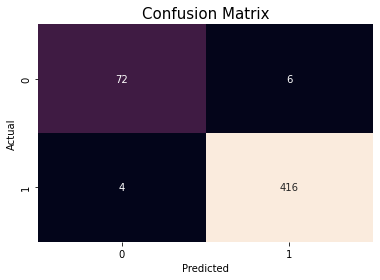

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        78
           1       0.99      0.99      0.99       420

    accuracy                           0.98       498
   macro avg       0.97      0.96      0.96       498
weighted avg       0.98      0.98      0.98       498



In [116]:
showMetrics("Confusion Matrix", y_val, pred_val)

In [117]:
#GridSearch CV for Gamma and C values
svc = SVC()
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000]
#Parameters
params = {'C': value,
          'gamma': value,
           'kernel': ['rbf']}
grid = GridSearchCV(estimator=svc, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [118]:
grid.fit(X_train_std_scal, y_tr)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000],
                         'kernel': ['rbf']},
             verbose=1)

In [119]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [120]:
gs_svc = SVC(kernel='rbf', C=1000, gamma=0.0001)
gs_svc.fit(X_train_std_scal, y_tr)

SVC(C=1000, gamma=0.0001)

In [122]:
#Training Accuracy
pred_train = gs_svc.predict(X_train_std_scal)
print("Accuracy Scores of Training",computeAccuracy(y_tr, pred_train))
#Validation Accuracy
pred_val = gs_svc.predict(X_val_std_scal)
print("Accuracy Scores of Validation",computeAccuracy(y_val, pred_val), "\n")

Accuracy Scores of Training 0.9728643216080402
Accuracy Scores of Validation 0.9799196787148594 



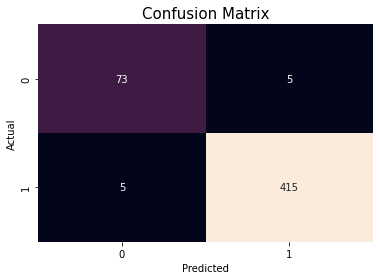

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        78
           1       0.99      0.99      0.99       420

    accuracy                           0.98       498
   macro avg       0.96      0.96      0.96       498
weighted avg       0.98      0.98      0.98       498



In [123]:
#Confusion Matrix
showMetrics("Confusion Matrix", y_val, pred_val)

We can conclude from the confusion matrix that the accuracy, recall, F1-score for the gridsearch CV is higher than that of the default model. Furthermore, the recall is 5% higher than the default model that can be used to predict the class 0 for the democratic winner and as well as the new model is not overfitting as the score is high for accuracy of training and validation.

In [124]:
#Comparing the Models
#The test set performance are printed 
def compareClssifier(name,clf, X_tr, y_tr_cat, X_te, y_te_cat ):
    clf.fit(X_tr, np.ravel(y_tr_cat))
    predicted = clf.predict(X_te)
    conf_matrix =  pd.crosstab(index=np.ravel(y_te_cat), 
                                    columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_te_cat , predicted),3)
    plt.title(name + "  " , fontsize = 15)
    plt.show()
#Printing the Classification Metrics
    print (metrics.classification_report(y_te_cat,predicted))

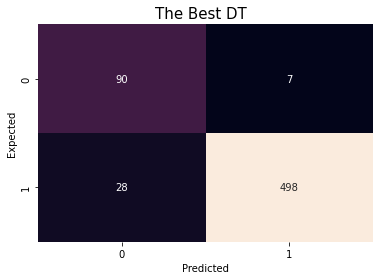

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        97
           1       0.99      0.95      0.97       526

    accuracy                           0.94       623
   macro avg       0.87      0.94      0.90       623
weighted avg       0.95      0.94      0.95       623



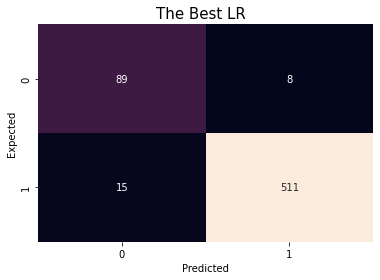

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        97
           1       0.98      0.97      0.98       526

    accuracy                           0.96       623
   macro avg       0.92      0.94      0.93       623
weighted avg       0.96      0.96      0.96       623



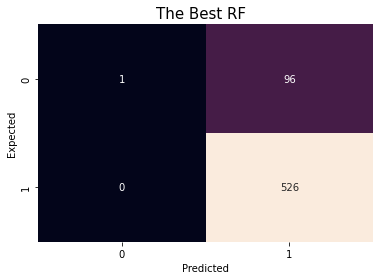

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        97
           1       0.85      1.00      0.92       526

    accuracy                           0.85       623
   macro avg       0.92      0.51      0.47       623
weighted avg       0.87      0.85      0.78       623



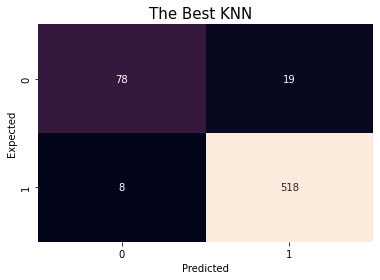

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        97
           1       0.96      0.98      0.97       526

    accuracy                           0.96       623
   macro avg       0.94      0.89      0.91       623
weighted avg       0.96      0.96      0.96       623



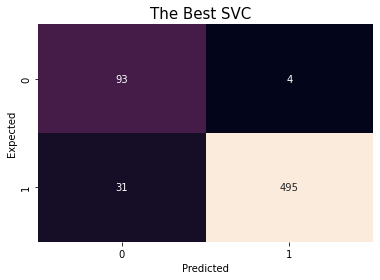

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        97
           1       0.99      0.94      0.97       526

    accuracy                           0.94       623
   macro avg       0.87      0.95      0.90       623
weighted avg       0.95      0.94      0.95       623



In [126]:
random_seed = 54
best_dec_tre = DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='entropy',
                       max_depth=5, min_samples_split=50, random_state=random_seed)
best_log =  LogisticRegression(solver = 'liblinear', 
                              penalty = 'l1', 
                              C = .06,
                              tol = .007,
                              random_state = random_seed)
best_rnd_for = RandomForestClassifier(criterion= 'entropy' ,max_features= 'auto',max_depth=3, min_samples_split=1000
                                ,n_estimators=5,random_state = random_seed)
best_knn = KNeighborsClassifier(n_neighbors=15)
best_svc = SVC(kernel='rbf', C=1000, gamma=0.0001, class_weight={0: 3, 1: 0.59})
#An array of classifiers are created
names = ["The Best DT", "The Best LR", "The Best RF", 
         "The Best KNN", "The Best SVC"]
classifiers= [best_dec_tre, best_log, best_rnd_for, best_knn, best_svc]
#The classifiers are iterated
for name, clf in zip(names, classifiers):
    compareClssifier(name,clf, X_train_std_scal, y_tr, X_test_std_scal, y_te )

Both the Logistic Regression and the K Nearest Neighbor has the same accuracy of 96% with the Precision, Recall, and F1-score being slightly higher in comparison to the others. Followed by Decision Tree, and Support Vector Machine in which each of them have the accuracy of 94% respectively with the Recall, F1-score, and Precision being good in comparison. The models that are given are not overfitting since the training and testing sets accuracy rates are closed to each other.

Decision Tree:
- The new model had an accuracy of 94% with Recall, F1-score, and Precision being 93%, 84%, and 76% respectively. 
- Furthermore, the GridSearchCV model was able to tell the class 0 and class 1.
- The new model is not overfitting in comparison to the default model.
- '2012 winner' is the most important feature among the decision tree followed by the 'median ages'.

Logistic Regression:
- The new model produced had an accuracy of 96% with Precision being 86%, Recall as 92%, and F1-Score as 89% respectively.
- Around 50% of the features were moved to 0 using the l2 regularization.
- The probability plot shows that the model is doing good in terms of high probabilistic predictions.
- The 'Atleast Bachelor's Degree' and 'countries between 2012 and 2008' are the important predictions.

Random Forest:
- The new model produced had an accuracy of 85% with Precision being 100%, Recall as 1%, and F1-Score as 2% respectively.
- There are seven important features such as the '2008 winner', 'HIV', 'Prevelance Rate', '2012 winner', 'graduate degree', 'at least a bachelor's degree', 'farming', 'fishing', and 'forestry occupation'.

KNN:
- 35 is the testing set that was used the number of neighbors for the accuracy.
- The accuracy was 96% with Recall as 80%, F1-score as 85%, and Precision as 91% respectively.
- 2012 and 2008 winner features were considered to be the most important features and permutation rankings were used for the rankings.

SVM:
- The new model produced had an accuracy of 94% with Precision being 75%, Recall as 96%, and F1-Score as 84% respectively.
- This model is not overfitting as the test and training set of the accuracy are close.

# Conclusion

- 2012 elections are considered to be the best features. Furthermore, the race, education level, median age also have higher impact on the election outcome. 
- In comparison to all the models that have been derived, we can see that all the models have higher accuracy, F1-score, sensitivity from 90-95%, that indicates that the models are performing good in terms of both the target classes.
- Also, the models are not overfitting since both the training and test sets are close to each other.